#Introduction to Regression with Neural network in Tensorflow

There are many definitions for regressions problem. In our case we are simplifying it: predicting numerical variables based on some other combination of variables, even shorter... predicting a number

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.1


##Creating data to view and fit

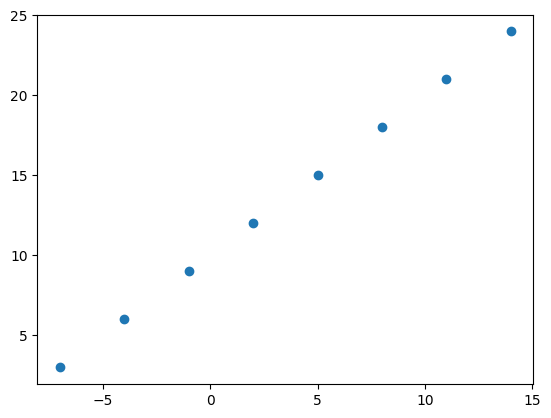

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);



In [ ]:
y ==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and Output shape

In [ ]:
#create demo for our housing preduction problem
house_info = tf.constant(["bedroom", "bathroom", "Garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'Garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X.shape
output_shape =y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
input_shape = X[0].shape
output_shape =y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
#Turn numpy array in to constant dtype float 32
X= tf.cast(tf.constant(X), dtype= tf.float32)
y= tf.cast(tf.constant(y), dtype= tf.float32)

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

#Major Steps in following Tensorflow

1. **Creating model** -define the input and output layers as well as hidden layer of deep learning model.
2. **Compiling the model**- define the loss function(in other words function tells models how wrong it is) and the optimizer (tells our model how to improve the pattern its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find the patterns between X and y(feature and labels)

In [ ]:
#set the random seed
tf.random.set_seed(42)

#Create model using Sequentional API
model =tf.keras.Sequential([
    tf.keras.layers.Dense(1)
]) #I wanna model which is sequentiolly go through the model

#compile the model
model.compile(loss =tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer =tf.keras.optimizers.SGD(), #SGD is short forstochatic gradient descent
              metrics = ["mae"]
              )

#fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.6763 - mae: 8.6763
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - loss: 8.5438 - mae: 8.5438
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 8.4113 - mae: 8.4113
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 8.2788 - mae: 8.2788
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 8.1463 - mae: 8.1463


In [ ]:
#checl X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#Try and make prediction
model.predict(tf.expand_dims(17.0, axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


array([[26.454445]], dtype=float32)

##Improve our model

We can improve our model, by altering steps we took to create a model

1. **Creating a model**- Here we add more layers, increasing the number of hidden units (all called neurons) within each hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps **learning rate** of the optimization function
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more example to learn from)

In [ ]:
#lets rebuild our model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(
    loss =tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics =["mae"]

)

#fit the model

model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 997ms/step - loss: 10.5202 - mae: 10.5202
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.3877 - mae: 10.3877
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 10.2552 - mae: 10.2552
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 10.1227 - mae: 10.1227
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 9.9902 - mae: 9.9902
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 9.8577 - mae: 9.8577
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.7252 - mae: 9.7252
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 9.5927 - mae: 9.5927
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 9.4602 - mae: 9.4602
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.3277 - mae: 9.3277
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 9.1952 - mae: 9.1952
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.0627 - mae: 9.0627
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
#lets see our model prediction has improve
model.predict(tf.expand_dims([17.0], axis =-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[30.160698]], dtype=float32)

In [ ]:
#extra layer with 100 hidden units

model =tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])
model.compile(
    loss =tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["mae"]
)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.2704 - mae: 13.2704
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12.5714 - mae: 12.5714
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.8664 - mae: 11.8664
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.1518 - mae: 11.1518
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.4239 - mae: 10.4239
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.6796 - mae: 9.6796
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.9162 - mae: 8.9162
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 8.1318 - mae: 8.1318
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.3239 - mae: 7.3239
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 6.8005 - mae: 6.8005
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.0077 - mae: 7.0077
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 7.3140 - mae: 7.3140
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


array([[28.026295]], dtype=float32)

##Evaluating a Model

In practice typical walkflow you'll go through when building neural network is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it-> tweak a model -> fit it -> evaluate
```

#When it come to evalouation... there are 3 words you should memorize
"Visualize visualize Visualize"

It is good idea to visualize
* The data - what data are working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perfect while it learn?
* The prediction of the model - How do the prediction of a model line up against the ground truth (original label)

In [ ]:
#Make a Bigger data set
X = tf.range(-100, 100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y =X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

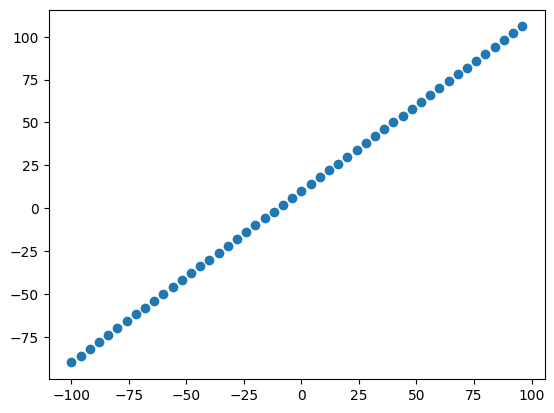

In [ ]:
#visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

#The 3 Sets

* **Training set** - model learn from this data which is typically about 70-80 percent of the total data available
* **Validation set** - the model which is tuned on this data, which is typically 10-15 percent
* **Test set** - The model get evoluated on this data to set what is learned this set is typically 10 to 15 percent of data available

In [ ]:
#check the length of the dataset
len(X)

50

In [ ]:
#split data in to train test and test set
X_train = X[:40] #first 40 are training sample (80% of the data)
y_train = y[:40]
X_test =X[40:] #last ten of the data
y_test =y[40:]

#Visualizing the data

Now we got our data in training and test sets.. let's visualize it again

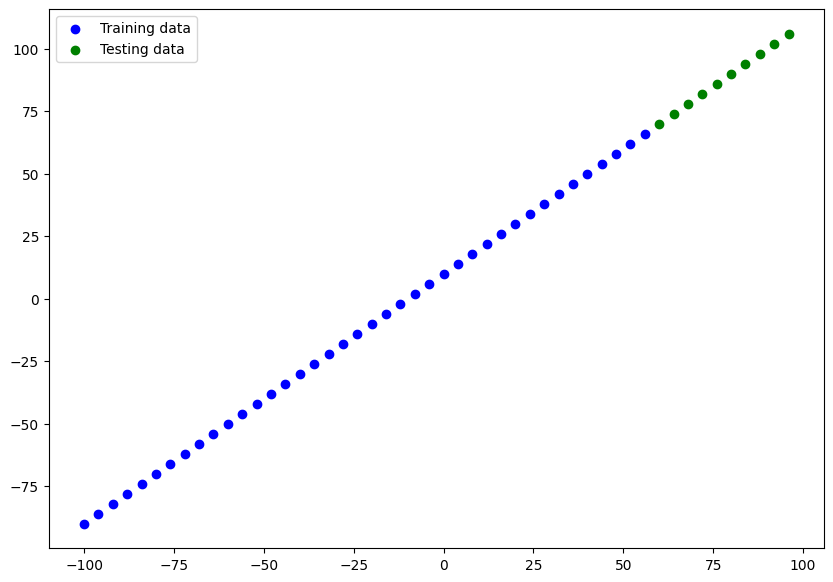

In [ ]:
plt.figure(figsize=(10,7))

#plot training data in blue
plt.scatter(X_train, y_train, color = 'blue', label = "Training data")

#plot set data in green color
plt.scatter(X_test, y_test, color = 'green', label = "Testing data")
plt.legend()

In [ ]:
#lets have to look at neural network to build

#create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer =tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

#fit the model
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs =100)


#Visualizing the model

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#lets create a model which builds automatically by defining input shape argument in the first layer

tf.random.set_seed(42)

#create a model same as above
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape= [1], name="input_layer"),
    tf.keras.layers.Dense(1, name ="output_layer")

], name = "model_summary")

#compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer =tf.keras.optimizers.SGD(),
    metrics =["mae"]
)

#model.fit(tf.expand_dims(X_test, axis=-1), y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "model_summary"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Total param - total number of parameters in the model.
* Tranable params - These are the parameters (The patterns) the model can update as it trains
* Non-trainable params - These parameters aren't updated during training(This is typical when u bring in already learn patterns or parameter from other models during **transfer learning**

In [ ]:
#lets fits our model to the training data
model.fit(
    tf.expand_dims(X_train, axis=-1),  # Expands X_train to shape (40, 1)
    y_train,  # Expands y_train to shape (40, 5)
    epochs=100,
    verbose=0
)

In [ ]:
model.summary()

Model: "model_summary"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

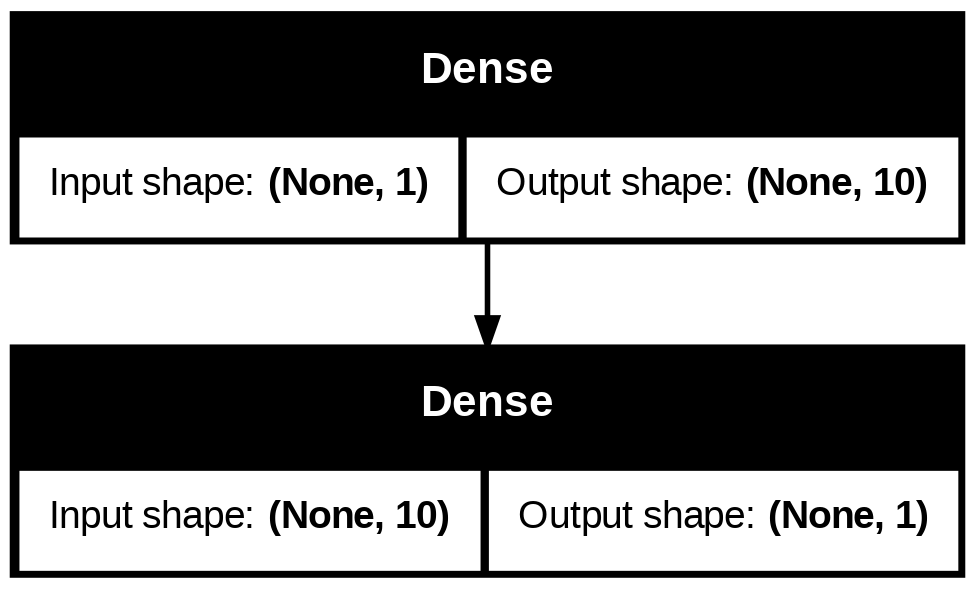

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

#Visualizing our model Prediction

To visualize the prediction good idea to plot them against the ground truth labels.

often you'll see this in form y_test or y_true vs y_pred (ground truth vs model's prediction)

In [ ]:
#make some prediction
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


array([[41.486294],
       [44.12157 ],
       [46.756847],
       [49.392128],
       [52.02741 ],
       [54.662685],
       [57.29796 ],
       [59.933243],
       [62.568527],
       [65.203804]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**note** - If you are feel like you are going to reuse some kind of functionality in the future, its a good idea to turn it into a function

In [ ]:
#lets create a plotting function
def plot_prediction(train_Data = X_train,
                    train_label = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    prediction = y_pred
                    ):

#plot training data , test data and compares prediction to ground truth labels

  plt.figure(figsize=(10,7))
  #plot trainig data in blue
  plt.scatter(train_Data, train_label, color ='blue', label ='Training data')

  #Plot testing data in green
  plt.scatter(test_data, test_labels, color = 'green', label = 'Testing data')

  #plot models prediction in red
  plt.scatter(test_data, prediction, color ='red', label = 'predictions')

  #show the legend
  plt.legend();



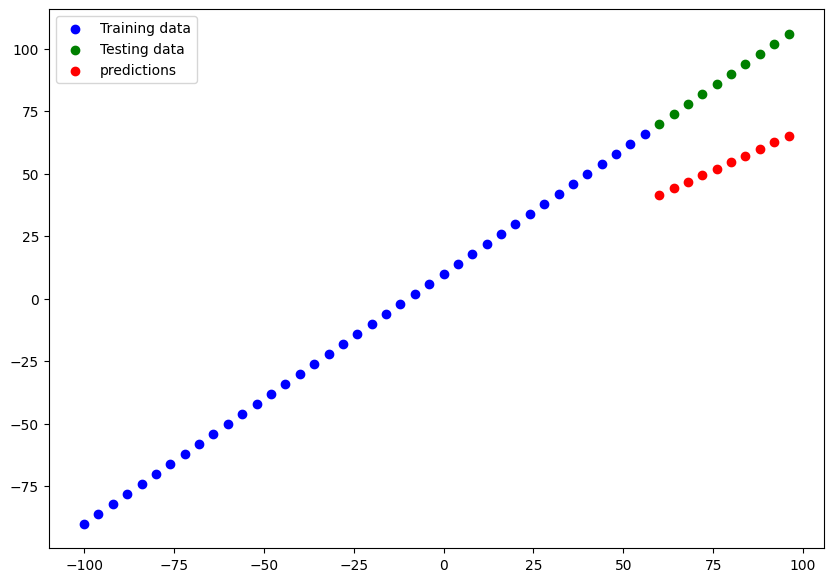

In [ ]:
plot_prediction()

#Evaluating our model's prediction with regression evaluation metrics

Depending on the problem you working on there will be different evaluation metrics to evaluate your model performance.

Since we are working in a regression problem two of the main metrics:
* **MAE** - Mean absolute error, on average how wrong each of my model's prediction
* **MSE** - Mean Square error, square the average errors

In [ ]:
#Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 34.6549 - mae: 34.6549


[34.65494918823242, 34.65494918823242]

In [ ]:
#calculate mean absolute error
mae = tf.keras.losses.MAE(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([28.513706, 29.87843 , 31.243153, 32.607872, 33.97259 , 35.337315,
       36.70204 , 38.066757, 39.431473, 40.796196], dtype=float32)>

In [ ]:
y_pred

array([[41.486294],
       [44.12157 ],
       [46.756847],
       [49.392128],
       [52.02741 ],
       [54.662685],
       [57.29796 ],
       [59.933243],
       [62.568527],
       [65.203804]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([41.486294, 44.12157 , 46.756847, 49.392128, 52.02741 , 54.662685,
       57.29796 , 59.933243, 62.568527, 65.203804], dtype=float32)>

In [ ]:
#calculate mean absolute error
mae = tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=34.654953>

In [ ]:
#calculate mean square error

mse = tf.keras.losses.mse(y_test, tf.squeeze(y_pred))
mse


<tf.Tensor: shape=(), dtype=float32, numpy=1216.3312>

In [ ]:
#Make some function to use MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.losses.MAE(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.keras.losses.mse(y_true, tf.squeeze(y_pred))

#Running experiment to improve our model

Build a model -> fit it -> evaluate it->  tweak it -> fit it -> evaluate it -> tweak it -> fit it-> evaluate it...

1. Get more data - get more example for your model to train on (more ooportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using more complex model) - this might come form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find a patterns in the data.

Lets do 3 modelling experiments

1. 'model_1' - same as the original model, 1 layer, trained for 100 epochs.
2. 'model_2' - 2 layers, trained for 100 epochs
3. 'model_3' - 2 layers trained for 500 epochs

**Build_model 1**

In [ ]:
#set random seed
tf.random.set_seed(42)

#create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile the model

model_1.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

#fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs =100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 443ms/step - loss: 11.8419 - mae: 11.8419
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.7663 - mae: 8.7663 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.2350 - mae: 10.2350 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.9920 - mae: 11.9920 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.7506 - mae: 12.7506 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8.2204 - mae: 8.2204
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.8919 - mae: 8.8919 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9376 - mae: 7.9376 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.5734 - mae: 9.5734 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9197 - mae: 7.9197 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.5618 - mae: 9.5618 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.9019 - mae: 7.9019 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


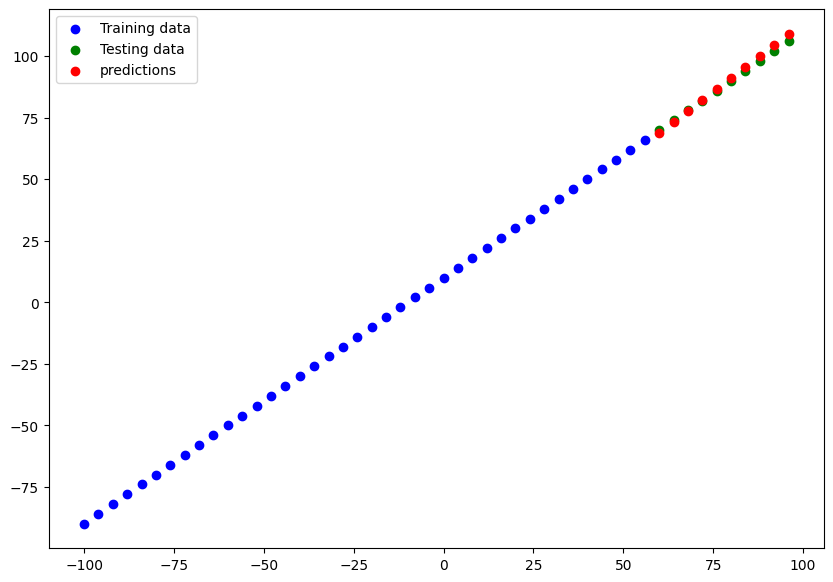

In [ ]:
#Make and plot prediction for model_1
y_pred_1 = model_1.predict(X_test)
plot_prediction(prediction=y_pred_1)

In [ ]:
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=1.3957756>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.8257241>)

**Build model 2**
* 2 dense layers trainded for 100 epochs


In [ ]:
#set the random seed
tf.random.set_seed(42)

#Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

#compile the model
model_2.compile(loss =tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"])

#fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 558ms/step - loss: 32.7496 - mse: 1591.1570
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25.5266 - mse: 935.5247 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.2938 - mse: 740.6296 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.0148 - mse: 716.4919
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.6413 - mse: 324.9125 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.8649 - mse: 475.4854 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.2524 - mse: 260.4838
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 15.2227 - mse: 320.5749
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 15.9767 - mse: 344.1358
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.9753 - mse: 218.1779 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.9603 - mse: 307.9012 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11.0177 - mse: 192.0959
Epoch 13/10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


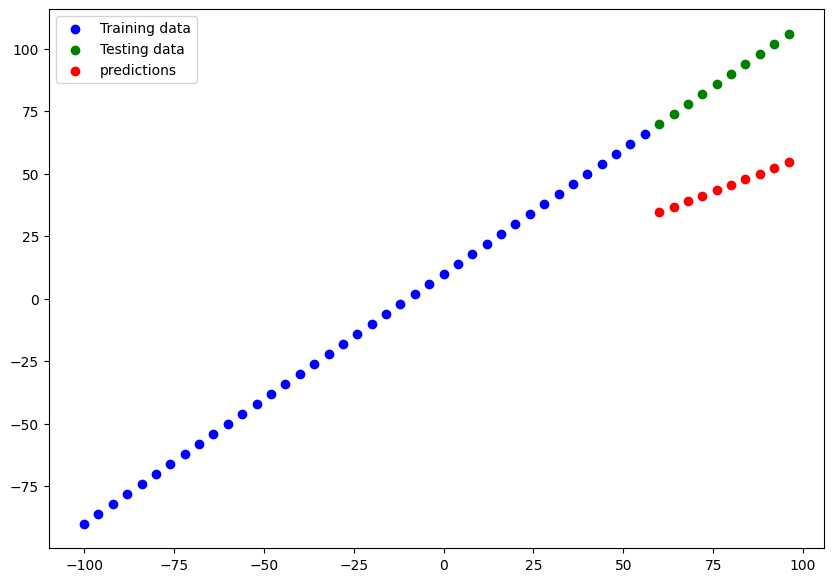

In [ ]:
#Make a plot prediction of model_2
y_pred_2 = model_2.predict(X_test)
plot_prediction(prediction=y_pred_2)

In [ ]:
#Calculate the model_2 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=43.41134>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1911.0867>)

In [ ]:
#Build model 3

#set the random seed
tf.random.set_seed(42)
#create the model
model_3 =tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.SGD(),
    metrics =['mae']
)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step - loss: 37.2407 - mae: 37.2407
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29.8494 - mae: 29.8494 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.4023 - mae: 16.4023 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.9244 - mae: 18.9244 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.4467 - mae: 17.4467 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.9164 - mae: 16.9164 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.8179 - mae: 11.8179 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.7097 - mae: 14.7097 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.5845 - mae: 15.5845 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.7094 - mae: 11.7094 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.6841 - mae: 14.6841 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.7459 - mae: 15.7459 
Epoch 13/500
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


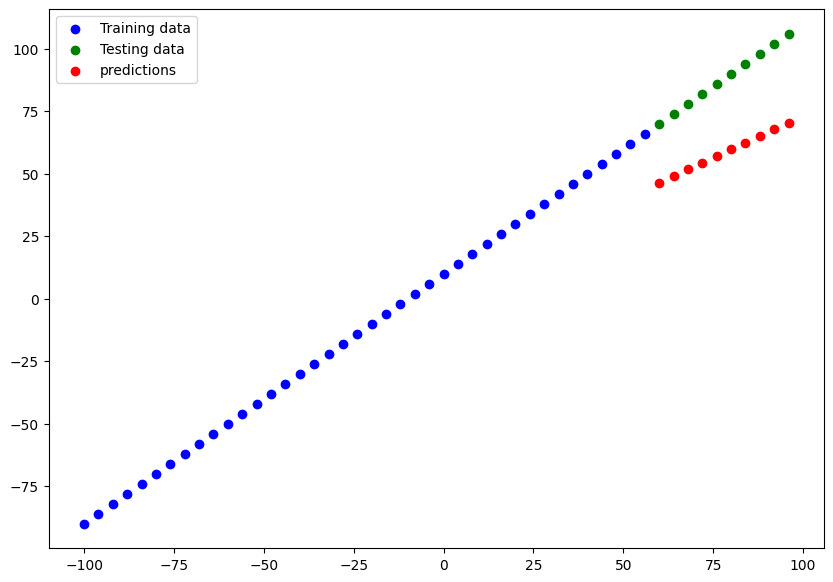

In [ ]:
y_pred_3 = model_3.predict(X_test),
plot_prediction(prediction=y_pred_3)

In [ ]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=29.509222>,
 <tf.Tensor: shape=(), dtype=float32, numpy=885.474>)

#Comparing the result of our experiment

We run few experiment we run the result


In [ ]:
#lets compare our data using pandas data frame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_result =pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_result

,model,mae,mse
0,model_1,1.395776,2.825724
1,model_2,43.411339,1911.086670
2,model_3,29.509222,885.473999


In [ ]:
model_3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

one of the main goal to minimize the time between experiments, The more experiment you do, the more things you figure out which don't work and in turn you get closer to figuring out what does work. Remember the machine learnig practitioner's motto- experiment , experiment, experiment

#Tracking your Experiments

one really good habit in machine learning modelling is to track the result of your experiment.

and when doing so it can be tedious if you are running lots of experiments.

Luckily there are tools to help us

* TensorBoard - This is the component of the Tensorflow library to help track modelling experiment (we'll see this one later)
* Weights and biases - a tool for tracking all kind of machine learning experiment (plugs straight into TensorBoard).  

#Saving our Models

Saving our model allow us to use them outside of google colab (or wherever they were trained) such as in a mobile application or a mobile app

There are two main format we can save our model too:
1. The save model format
2. The HDF5 format


In [ ]:
model_2.save("best_model.keras")

In [ ]:
#save model using hdf5 format
model_2.save("best_model_HDF5_format.h5")

#Loading Saved model

In [ ]:
#loading in saved model
loaded_saved_model_format = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_saved_model_format.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
#compare saved model prediction with savedmodel format model prediction
model_2_preds = model_2.predict(X_test)
loaded_saved_model_format_preds = loaded_saved_model_format.predict(X_test)

model_2_preds ==loaded_saved_model_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

#Download a model or any other file from google colab

If you want to download your files from google colab:

1. You can go to the "files" tab and right click on the file you are after and click "download".
2. Use the code (see the cell below)
3. Save it to google drive by connecting Google drive and copying it there(see 2nd code cell below)



In [ ]:
#Download file from google colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Save a file from Google colab to Google Drive (require mounting Google drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive

In [ ]:
!ls /content/drive/MyDrive

 20170206201796249150200026409.pdf   Front.gdoc		    kmd.docx
'20180706_111709 (1).jpg'	     Fwd:.pdf		    kmds.gsite
 20180706_111709.jpg		    'Getting started.pdf'  'Practical 5 - MS Excel (1).docx'
 best_model_HDF5_format.h5	    'Group Project'	   'Practicle 5- part 2 MS Excel cv.xlsx'
 Bookstore.rar			    'https:  drive.g.txt'  'Practicle 5- part 2 MS Excel.xlsx'
'Colab Notebooks'		    'kavindu (3)4.docx'    'Re: Fwd: (1).pdf'
 Drawing1-Model.pdf		    'kavindu (3)4.gdoc'    'Re: Fwd:.pdf'
 E2240183_ICT_Project.zip	     kavindu.pptx	   'Untitled site.gsite'


#A larger Example

In [ ]:
#Import Required Libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Read in insurance Dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
#Lets try one hot encode our dataframe so its all numbers
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
#Ctreate x and Y values(Features and labels)
X = insurance_one_hot.drop("charges", axis =1)
y = insurance_one_hot["charges"]

In [ ]:
#view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [ ]:
#View y
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
#Create tarining and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size =0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
#Build a neural network (sort of like model_2 above)
tf.random.set_seed =42

#create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile the model
insurance_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

#fit the model

insurance_model.fit(X_train, y_train, epochs =100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10150.0439 - mae: 10150.0439   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8011.9541 - mae: 8011.9541   
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7570.0591 - mae: 7570.0591 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7274.1714 - mae: 7274.1714 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7658.5874 - mae: 7658.5874 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7663.0015 - mae: 7663.0015 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7623.1226 - mae: 7623.1226 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7453.6416 - mae: 7453.6416 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7462.6489 - mae: 7462.6489 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8032.9619 - mae: 8032.9619   
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7079.1802 - mae: 7079.1802 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━

In [ ]:
#Check the result of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7838.7007 - mae: 7838.7007  


[7559.25390625, 7559.25390625]

In [ ]:
y_train

,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130
...,...
1095,4561.18850
1130,8582.30230
1294,11931.12525
860,46113.51100


In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

#Right now our model is not perform good lets try to improve

To try improve our model lets try two experiment
1. Add an extra layer with more hidden unit
2. Train for longer
3. Insert your own experiment here




In [ ]:
#set random seed
tf.random.set_seed =42
#create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
]
)

#compile the model

insurance_model_2.compile(
    loss =tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

#fit the model
insurance_model_2.fit(X_train, y_train, epochs =100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13214.6992 - mae: 13214.6992
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12865.9697 - mae: 12865.9697
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13391.9863 - mae: 13391.9863
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12486.1240 - mae: 12486.1240
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11707.6641 - mae: 11707.6641
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9985.7500 - mae: 9985.7500  
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8680.5107 - mae: 8680.5107
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7708.1948 - mae: 7708.1948
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6853.0601 - mae: 6853.0601
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7492.8076 - mae: 7492.8076
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7548.8345 - mae: 7548.8345
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
#Evaluate the large model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5325.0469 - mae: 5325.0469  


[5156.42333984375, 5156.42333984375]

In [ ]:
#another model

tf.random.set_seed =42

#set the model

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(
    loss =tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics =["mae"]
)

history = insurance_model_3.fit(X_train, y_train, epochs =200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13298.6572 - mae: 13298.6572
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13317.9443 - mae: 13317.9443 
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13063.5713 - mae: 13063.5713 
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11905.0928 - mae: 11905.0928
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11113.7285 - mae: 11113.7285
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9094.8369 - mae: 9094.8369 
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7769.4785 - mae: 7769.4785 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7643.3677 - mae: 7643.3677 
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7337.7407 - mae: 7337.7407   
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7379.3608 - mae: 7379.3608
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7531.2046 - mae: 7531.2046 
Epoch 12/200
34/34 ━━━━━━━━━━━━━━

In [ ]:
#Evaluate our model
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3545.8511 - mae: 3545.8511  


[3475.63818359375, 3475.63818359375]

Text(0.5, 0, 'epochs')

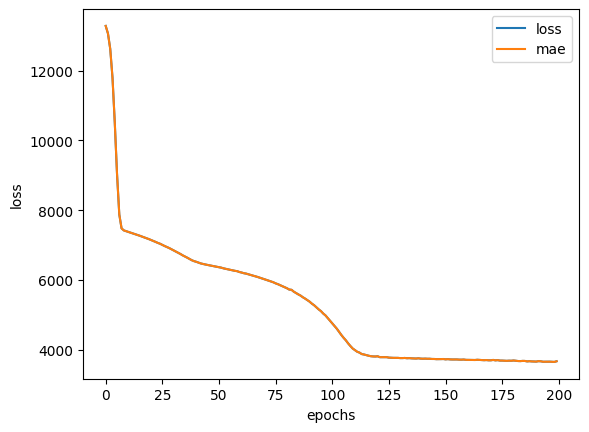

In [ ]:
#Plot history(also known as a loss curve or a training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

#How long should you train

It depends on the problem you working for. However many people asking for... So tesorflow has a solution. It is called the early stopping callback, which tensorflow component you can add to your model to stop training once it stop improving a certain metrics.


#Preprocessing Data (Normalization and Standardization)

In terms of scaling values, neural network tend to prefer normalization. If you are not sure on which to use, you could try both and see which perform better.

<Axes: ylabel='Frequency'>

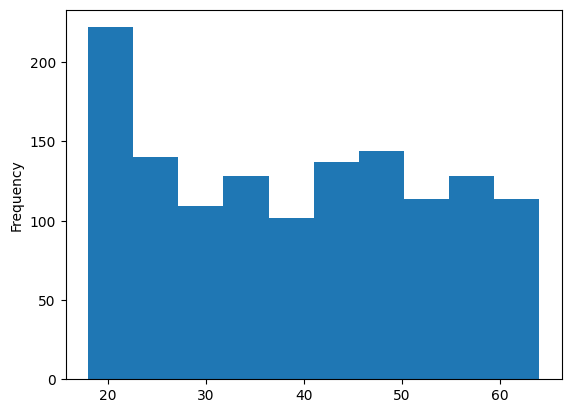

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

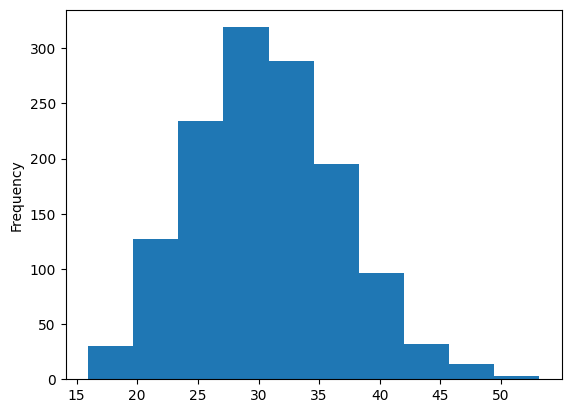

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#To prepare our data we can burrow few classes from sciket learn

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #turn all these column between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker","region"])
)

#create X and y
X = insurance.drop("charges", axis =1)
y= insurance["charges"]

#build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder

X_train_normal =ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

our data has been normalized and one hot encoded. Now lets build a neural network model on it and see how it goes

In [ ]:
#Build a neural network model to fit on our normalized data
tf.random.set_seed=42

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(
    loss = tf.keras.losses.mae,
    optimizer =tf.keras.optimizers.Adam(),
    metrics =["mae"]
)

insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 12942.6055 - mae: 12942.6055
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13254.1377 - mae: 13254.1377
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13791.2373 - mae: 13791.2373
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13378.6602 - mae: 13378.6602
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12902.4512 - mae: 12902.4512
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13253.5020 - mae: 13253.5020
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12214.6504 - mae: 12214.6504
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12906.8604 - mae: 12906.8604
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12468.1250 - mae: 12468.1250
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12388.2764 - mae: 12388.2764
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11475.9814 - mae: 11475.9814
Epoch 12/100
34/34 ━━━━━━━━━━━

In [ ]:
#Evaluate our insurance model
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3529.6570 - mae: 3529.6570  


[3442.42431640625, 3442.42431640625]

In [ ]:
#insurance_model_2 results


In [ ]:
#Evaluate the large model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5325.0469 - mae: 5325.0469  


[5156.42333984375, 5156.42333984375]